In [4]:
#==================================================
#******************Question 2********************
#--------------------------------------------------
#Student Name: Sopumelela
#Student Surname: Sandekela
#Student Number: CON-1475940-C5L6
#==================================================

import numpy as np
import pandas as pd
#=================================================
#2.1 Creating Freqyency Tables.
#=================================================

data_firstExamn = pd.read_csv("First Examination.csv")
data_SecondExamn = pd.read_csv("Second Examination.csv")

#-------------------------------------------------------------------------------
#FUCTION: For creating Frequency table by passing in data frame.
#-------------------------------------------------------------------------------
def create_FreqTable(dataframe):
    # Initialize an empty dictionary to store frequency counts
    freq_table = {}

    # Define ranges for hours spent on campus
    hours_ranges = {
        '1-2 Hours': (0, 2),
        '2-3 Hours': (2, 3),
        '4-5 Hours': (3, 5)
    }

    # Define ranges for student age
    age_ranges = {
        '18-25': (17, 25),
        '25-35': (25, 35),
        '35-45': (35, 45),
        'Over 45': (45, 60)
    }

    # Define ranges for student marks
    marks_ranges = {
        '0-30': (0, 30),
        '31-60': (30, 60),
        '61-90': (60, 90),
        '91-100': (90, 100)
    }

   # Creating the new Colums on the dataframe 
   #-------------------------------------------------------------------------------
    
    dataframe["Average hours"] = round(dataframe[["1-2 Hours",
                                 "2-3 Hours",
                                 "4-5 Hours"]].mean(axis=1), 2) 

    hours_bins = [0, 2, 3, 5]
    hours_labels = ["1-2", "2-3", "4-5"]
    dataframe["Hours Category"] = pd.cut(dataframe["Average hours"], 
                                bins=hours_bins, labels=hours_labels)             
    

    #Student age.
    age_bins = [18, 25, 35, 45, np.inf]
    age_labels = ["18-25", "25-35", "35-45", "Over 45"]
    dataframe["Age Category"] = pd.cut(dataframe["Age 25-35"],
                                bins=age_bins, labels=age_labels)


    #Student student marks.
    marks_bins = [0, 30, 60, 90, 100]
    marks_labels = ["0-30", "31-60", "61-90", "91-100"]
    dataframe["Marks Category"] = pd.cut(dataframe["Marks achieved"],
                                bins=marks_bins, labels=marks_labels)    
    #-------------------------------------------------------------------------------
    
    
    # Iterate through each row in the DataFrame
    #-------------------------------------------------------------------------------
    for index, row in dataframe.iterrows():
        
        # Increment frequency count for hours spent on campus
        for hour_range, (start, end) in hours_ranges.items():
            if start <= row['Average hours'] < end:
                freq_table[hour_range] = freq_table.get(hour_range, 0) + 1        

        # Increment frequency count for student age
        #Age 18-25
        for age_range, (start, end) in age_ranges.items():
            if start <= row['Age 18-25'] < end:
                freq_table[age_range] = freq_table.get(age_range, 0) + 1
        #Age 25-35        
        for age_range, (start, end) in age_ranges.items():
            if start <= row['Age 25-35'] < end:
                freq_table[age_range] = freq_table.get(age_range, 0) + 1
       
        #Age 35-45        
        for age_range, (start, end) in age_ranges.items():
            if start <= row['Age 35-45'] < end: 
                freq_table[age_range] = freq_table.get(age_range, 0) + 1
                
        #Age over 45
        for age_range, (start, end) in age_ranges.items():
            if start <= row['Over 45 age'] < end: 
                freq_table[age_range] = freq_table.get(age_range, 0) + 1

                
        # Increment frequency count for student marks
        for mark_range, (start, end) in marks_ranges.items():
            if start <= row['Marks achieved'] < end:
                freq_table[mark_range] = freq_table.get(mark_range, 0) + 1
    #-------------------------------------------------------------------------------      
                
    return freq_table #Return the dictionary
#-----------------------------------------------------------------------------------

#Calling the function
#-------------------------------------------------------------------------------------------
# Call the function for each examination data
dictFreq1 = create_FreqTable(data_firstExamn)
dictFreq2 = create_FreqTable(data_SecondExamn)

# Convert dictionaries to Pandas Series
series1 = pd.Series(dictFreq1)
series2 = pd.Series(dictFreq2)

# Create DataFrames from Series
df1 = pd.DataFrame(series1, columns=['Frequency:'])
df2 = pd.DataFrame(series2, columns=['Frequency:'])

# Transpose the DataFrames
frequency_table_df1 = df1.transpose()
frequency_table_df2 = df2.transpose()


# Display the frequency tables
print("******************************************************************************")
print("******************************-FREQUENCY TABLES-******************************")
print("******************************************************************************")
print("------------------------------------------------------------------------------")
print("First Examination:")
print("------------------------------------------------------------------------------")
print(frequency_table_df1)
print("------------------------------------------------------------------------------")
print("Second Examination:")
print("------------------------------------------------------------------------------")
print(frequency_table_df2)
print("******************************************************************************") 
#-------------------------------------------------------------------------------------------

******************************************************************************
******************************-FREQUENCY TABLES-******************************
******************************************************************************
------------------------------------------------------------------------------
First Examination:
------------------------------------------------------------------------------
            1-2 Hours  18-25  31-60  35-45  0-30  25-35  61-90  91-100  \
Frequency:        150     39     40     27    48     43     40      21   

            Over 45  
Frequency:       40  
------------------------------------------------------------------------------
Second Examination:
------------------------------------------------------------------------------
            1-2 Hours  Over 45  0-30  18-25  61-90  91-100  25-35  31-60  \
Frequency:        150       36    30     34     58      18     39     44   

            35-45  
Frequency:     39  
**********************

In [59]:
print('===================================================================')
print('**************************-QUESTION2.2-****************************')
print('===================================================================')



**************************-QUESTION2.2-****************************


First Data Package: 


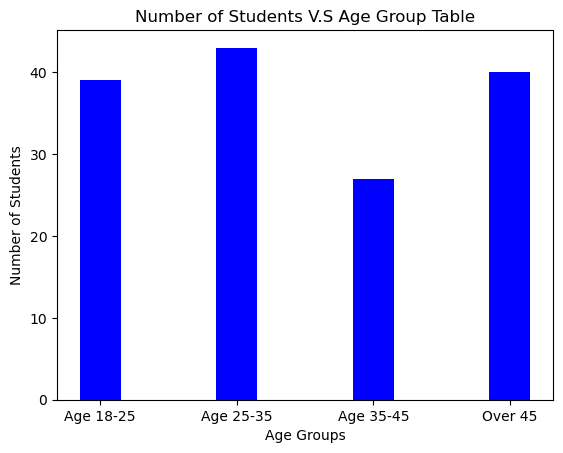

Second Data Package: 


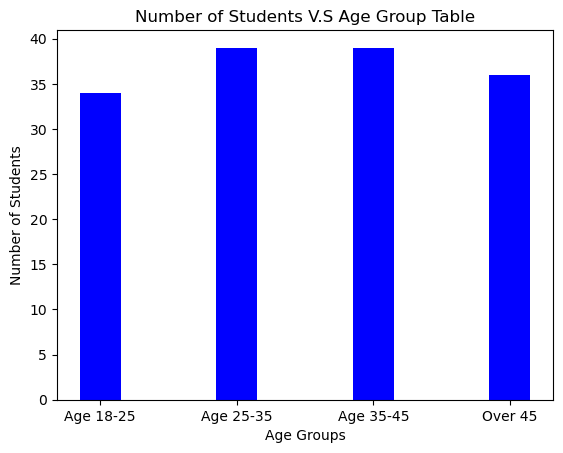

In [5]:
#================================================================
#**************************-BAR GRAPH-***************************
#================================================================
import matplotlib.pyplot as plt

#BAR shows ages and num of students, x-axis = ages groups.
#-----------------------------------------------------------------------------------------------
#FUNCTION: Ploting a Bar Graph using data in dictionary
#-----------------------------------------------------------------------------------------------
def plot_bar_graph(dictionary):
    #plt.bar(x-Axis, y-Axis)
    plt.bar(['Age 18-25','Age 25-35','Age 35-45', 'Over 45'], 
        [dictionary['18-25'], dictionary['25-35'], dictionary['35-45'], dictionary['Over 45']], 
            width=0.3, color='blue')

    plt.xlabel("Age Groups") #x-Axis Label
    plt.ylabel("Number of Students") #y-Axis Label
    plt.title("Number of Students V.S Age Group Table") #Title of the graph
    plt.show()

print("First Data Package: ")
plot_bar_graph(dictFreq1) #Passing the first csv's data dictionaries

print("Second Data Package: ") #Passing the first csv's data dictionaries
plot_bar_graph(dictFreq2)
#-----------------------------------------------------------------------------------------------

First Data Package: 


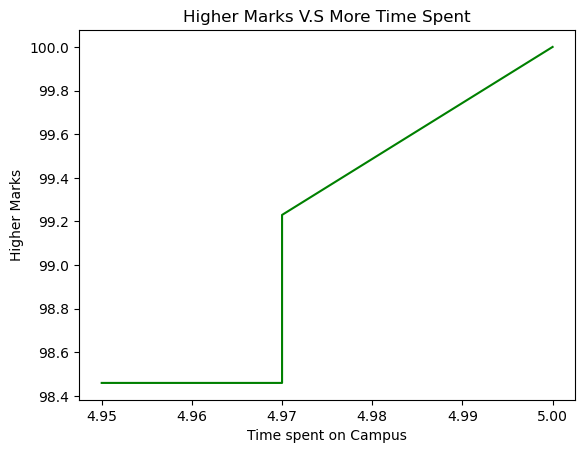

Second Data Package: 


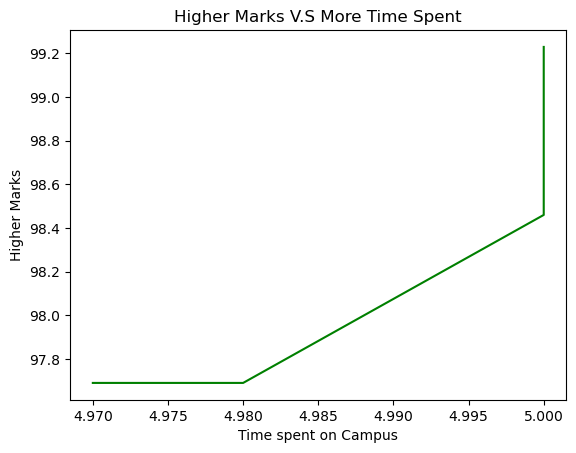

In [5]:
#=================================================================
#**************************-LINE GRAPH-***************************
#=================================================================
import numpy as np
import matplotlib.pyplot as plt


#------------------------------------------------------------------------
#FUCNTION: TURN COLUMN TO numpy ARRAY.
#------------------------------------------------------------------------
def transfer_to_array(dataframeColumn):
    arr = np.array([])
    for line in dataframeColumn:
        if line != 0:
            arr = np.append(arr, line)
    
    #Sort the marks to get the highest properly
    arrSorted = np.sort(arr)

    return arrSorted
#------------------------------------------------------------------------

#---------------------------------------------------------------------------------
#FUCNTION: CREATE THE LINE GRAPH USING THE POPULATED ARRAYS.
#---------------------------------------------------------------------------------
def create_graph(dataframeMarks, dataframeHours):
    
    yAxisTime = transfer_to_array(dataframeMarks)
    xAxisMarks = transfer_to_array(dataframeHours)

    xAxis = [xAxisMarks[-1], xAxisMarks[-2], xAxisMarks[-3], xAxisMarks[-4]]
    yAxis = [yAxisTime[-1], yAxisTime[-2], yAxisTime[-3], yAxisTime[-4]]

    plt.plot(xAxis, yAxis, color='green')
    plt.xlabel("Time spent on Campus")
    plt.ylabel("Higher Marks")
    plt.title("Higher Marks V.S More Time Spent")
    plt.show()
    
#First data frame   
print("First Data Package: ")
create_graph(data_firstExamn['Marks achieved'], data_firstExamn['4-5 Hours'])


#Second data frame 
print("Second Data Package: ")
create_graph(data_SecondExamn['Marks achieved'], data_SecondExamn['4-5 Hours'])
#---------------------------------------------------------------------------------

First Data Package: 


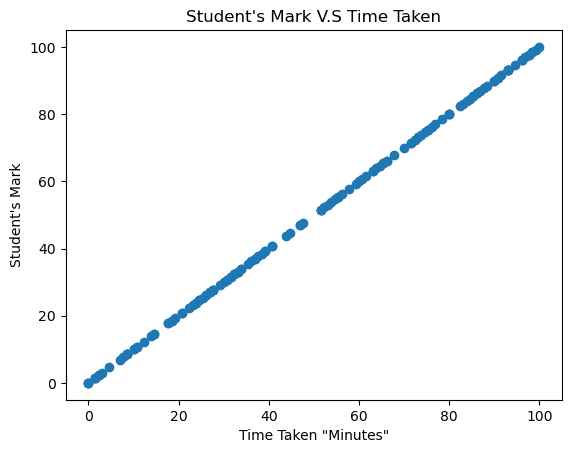

Second Data Package: 


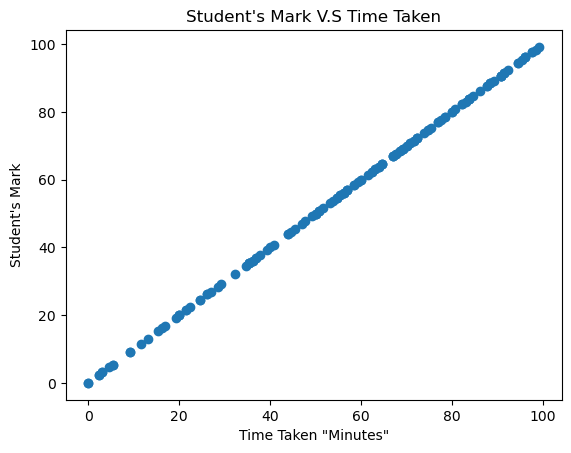

In [54]:
#=================================================================
#*********-SCATTER CHART-STUDENT MARKS V.S TIME TAKEN*************
#=================================================================
#I need to make scatter plots student marks & time taken in minutes.
import numpy as np
import matplotlib.pyplot as plt

#---------------------------------------------------------------------------------
#FUCNTION: Plot scatter chart.
#---------------------------------------------------------------------------------
def plot_Scatter_Chart(dataExamn1_2, dataExamn2_3, dataExamn4_5, dataExamnMarks):
    #---------------------------------------------------------------------------------
    #FUCNTION: POPULATING ARRAYS MIXING TIME RANGES.
    #---------------------------------------------------------------------------------
    def mix_time_ranges(dataColumn1, dataColumn2, dataColumn3):

        arrTime = np.array([])
        for value in dataColumn1:
            if value != 0:
                minutes = value * 60
                arrTime = np.append(arrTime, minutes)

        for value in dataColumn2:
            if value != 0:
                minutes = value * 60
                arrTime = np.append(arrTime, minutes)
 
        for value in dataColumn3:
            if value != 0:
                minutes = value * 60
                arrTime = np.append(arrTime, minutes)

        return arrMarks
    #---------------------------------------------------------------------------------

#---------------------------------------------------------------------------------
    #Turn marks to arrays...    
    arrMarks = np.array([])    
    for value in dataExamnMarks:
        arrMarks = np.append(arrMarks, value)
        
    yAxis = arrMarks
    xAxis = mix_time_ranges(dataExamn1_2, 
                            dataExamn2_3, 
                            dataExamn4_5)
    
    plt.scatter(xAxis, yAxis)
    plt.title("Student's Mark V.S Time Taken")
    plt.ylabel("Student's Mark")
    plt.xlabel('Time Taken "Minutes"')
    plt.show()
#---------------------------------------------------------------------------------   
#First Data Frame...  
print("First Data Package: ")
plot_Scatter_Chart(data_firstExamn['1-2 Hours'], 
                   data_firstExamn['2-3 Hours'], 
                   data_firstExamn['4-5 Hours'], 
                   data_firstExamn['Marks achieved'])
print("Second Data Package: ")
#Second Data Frame... 
plot_Scatter_Chart(data_SecondExamn['1-2 Hours'], 
                   data_SecondExamn['2-3 Hours'], 
                   data_SecondExamn['4-5 Hours'], 
                   data_SecondExamn['Marks achieved'])
#---------------------------------------------------------------------------------


First Data Package: 


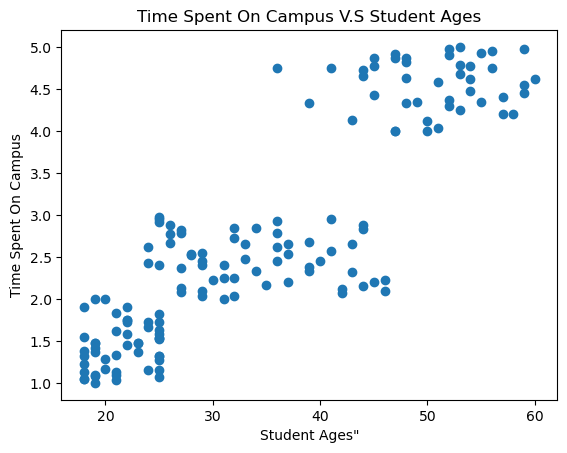

Second Data Package: 


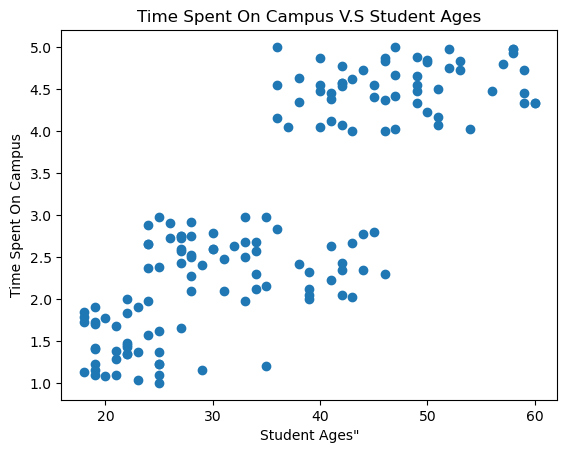

In [55]:
#=================================================================
#***********-SCATTER CHART-TIME SPENT V.S STUDENT AGES************
#=================================================================
#I need to make scatter plots time spent on campus and student ages.
#Fast fast now now mfe2!!!
 
#------------------------------------------------------------------------
#FUCNTION: Populate time & age arrays.
#------------------------------------------------------------------------   
def get_data(dataframe):
    arrTimeSpent = np.array([])
    arrStudAge = np.array([])
    
    def append_array(column, arr):
        for value in column:
            if value != 0:
                arr = np.append(arr, value)
        return arr

    #Append Time ARRAY...    
    arrTimeSpent = append_array(dataframe['1-2 Hours'], arrTimeSpent)
    arrTimeSpent = append_array(dataframe['2-3 Hours'], arrTimeSpent)
    arrTimeSpent = append_array(dataframe['4-5 Hours'], arrTimeSpent)

    #Append Student Age ARRAY...
    arrStudAge = append_array(dataframe['Age 18-25'], arrStudAge)
    arrStudAge = append_array(dataframe['Age 25-35'], arrStudAge)
    arrStudAge = append_array(dataframe['Age 35-45'], arrStudAge)
    arrStudAge = append_array(dataframe['Over 45 age'], arrStudAge)

    return arrTimeSpent, arrStudAge
    #---------------------------------------------------------------------

arrTime1, arrAge1 = get_data(data_firstExamn)
arrTime2, arrAge2 = get_data(data_SecondExamn)
#-------------------------------------------------------------------------

#---------------------------------------------------------
#FUCNTION: Plot scatter chart.
#--------------------------------------------------------- 
def plot_scatter_chart(xAxis, yAxis):
    plt.scatter(xAxis, yAxis)
    plt.title("Time Spent On Campus V.S Student Ages")
    plt.ylabel("Time Spent On Campus")
    plt.xlabel('Student Ages"')
    plt.show()
    
print("First Data Package: ")
plot_scatter_chart(arrAge1, arrTime1)

print("Second Data Package: ")
plot_scatter_chart(arrAge2, arrTime2)
#---------------------------------------------------------
    